# Importing Datasets

In [78]:
import numpy as np
import pandas as pd
# np.random.seed(42)

training_data = pd.read_csv('./input/train.csv') #training set
testing_data = pd.read_csv('./input/test.csv') #test set

training_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [79]:
train_df = training_data.drop(columns=['id', 'keyword','location']) #only text and target

In [80]:
#writing txt with tweets
tweets = list(train_df.text) 
with open('tweets.txt', 'w') as f:
    for tweet in tweets:
        f.write(str(repr(tweet))+'\n')

# Text Pre-Processing

In [81]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import json
with open('abbreviations.txt') as data:  #dictionary with abbreviations to replace
    abbreviations = data.read()
abbreviations = json.loads(abbreviations)

def pre_process_text(data_df, COLUMN='text', ABBREVIATIONS=True, LEMMATIZATION=True, STOPWORDS=True, WORD_REPLACE=True, WORD_REMOVE=False):

    stop_words = stopwords.words('english')
    lemmatizer = WordNetLemmatizer()
    
    text_list = data_df[COLUMN]
    new_list = []
    
    text_list = [text.lower() for text in text_list]  #all text in lowercase / transformando todo texto em letras minúsculas
    text_list = [re.sub(r'\n', ' ', text) for text in text_list] #removing linebreak '\n' / removendo quebra de linha '\n'
    if WORD_REPLACE:
        text_list = [re.sub(r'#+(\S+)', r' HASTAG \1', text) for text in text_list] #replacing '#' with 'HASTAG' / substituindo '#' por 'HASTAG'
    if WORD_REMOVE:
        text_list = [re.sub(r'#+(\S+)', r'\1', text) for text in text_list] #removing '#' / removendo '#'
    for text in text_list:
        text = text.split()     #splitting text into list of words / dividindo texto em lista de palavras
        if ABBREVIATIONS:
            f = lambda word: abbreviations[word] if word in abbreviations.keys() else word
            text = [f(word) for word in text] #replacing abbreviations with full word / substituindo abreviacoes por palavra inteira
        if STOPWORDS:
            g = lambda word: '' if word in stop_words else word
            text = [g(word) for word in text] #removing stopwords / removendo stopwords
        if LEMMATIZATION:
            text = [lemmatizer.lemmatize(word) for word in text]    #lemmatizating words / fazendo a lemmatizacao das palavras
        if WORD_REPLACE:
            text = [re.sub(r'\A@.+',r'USER', word) for word in text]    #replacing '@user' with 'USER' / substituindo '@user' por 'USER'
            text = [re.sub(r'https?:\/\/.*', 'URL', word) for word in text]     #replacing web link with 'URL' / substituindo link da internet por 'URL'
            text = [re.sub(r'.*\d+.*','NUMBER', word) for word in text]     #replacing numbers with 'NUMBER' / substituindo numeros por 'NUMBER'
        if WORD_REMOVE:
            text = [re.sub(r'\A@.+',r'', word) for word in text]
            text = [re.sub(r'https?:\/\/.*', '', word) for word in text]
            text = [re.sub(r'.*\d+.*','', word) for word in text]            
        text = [re.sub(r'[^\w\s]','', word) for word in text]       #removing punctuation / removendo pontuacao
        text = [word for word in text if word != '']        #removing empty words / removendo palavras vazias
        new_list.append(' '.join(text))     #words to text / juntando palavras em um texto por tweet
    return new_list
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jamil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jamil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jamil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jamil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [82]:
texts_df = train_df.copy()

## Round 1 : Data Cleaning, Twitter Words Replacement, Abbreviations Replacement, Lemmatization and Stop Words Removal

In [83]:
texts_df['round1'] = pre_process_text(texts_df) #pre-processing text
#writing txt with texts
round1 = list(texts_df.round1) 
with open('round1.txt', 'w') as f:
    for text in round1:
        f.write(str(repr(text))+'\n')

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#function to create wordclouds / função para criar nuvem de palavras
def createWordCloud(data_df, COLUMN, DISASTER): #(dataframe, coluna, disastre ou nao)
    common_words=''
    data_df = data_df.reset_index() # make sure indexes pair with number of rows
    for index, row in data_df.iterrows():
        if row['target'] == DISASTER:
            i = str(row[COLUMN])
            tokens = i.split()
            common_words += " ".join(tokens)+" "

    wordcloud = WordCloud(normalize_plurals=False).generate(common_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

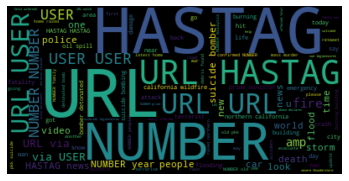

In [85]:
#WordCloud for disaster tweets in round 1 / nuvem de palavras para tweets sobre desastres do round 1
round1_disaster = createWordCloud(texts_df, 'round1', True)
round1_disaster

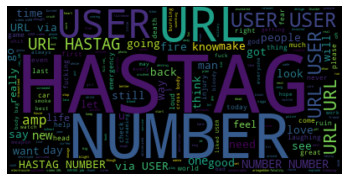

In [86]:
#WordCloud for not disaster tweets in round 1 / nuvem de palavras para tweets normais do round 2
round1_not_disaster = createWordCloud(texts_df, 'round1', False)
round1_not_disaster

In [87]:
# round1_disaster_freq = []
# round1_not_disaster_freq = []

# #creating 2 differents lists with disaster and not disaster tweets for counting / 
# #separando tweets sobre desastres e normais em 2 listas diferentes para contagem
# texts_df = texts_df.reset_index() # make sure indexes pair with number of rows
# for index, row in texts_df.iterrows():
#     if row['target'] == 1:
#         round1_disaster_freq.append(row['round1'])
#     else:
#         round1_not_disaster_freq.append(row['round1'])
# round1_disaster_freq = pd.Series(round1_disaster_freq)
# round1_disaster_freq = pd.Series(' '.join(round1_disaster_freq).split()).value_counts()[:20]    #20 plus frequent words in disaster tweets /
#                                                                                                 #20 palavras mais frequentes em tweets sobre desastres

# round1_not_disaster_freq = pd.Series(round1_not_disaster_freq)
# round1_not_disaster_freq = pd.Series(' '.join(round1_not_disaster_freq).split()).value_counts()[:20]    #20 plus frequent words in not disaster tweets /
#                                                                                                         #20 palavras mais frequentes em tweets normais

# round1_common_words = []
# #creating list with common words in both disaster and not disaster most frequent words lists / 
# #criando lista com as palavras em comum nas listas de palavras mais frequentes de tweets normais e sobre desastres
# for words in round1_not_disaster_freq.iteritems():
#     if words[0] in round1_disaster_freq:
#         round1_common_words.append(words[0])

# round1_common_words

## Round 2: Data Cleaning, Twitter Words Removal, Abbreviations Replacement, Lemmatization and Stop Words Removal

In [88]:
# import re
# import string

# #removing common frequent words from tweets / 
# #removendo palavras frequentes em comum dos tweets
# def remove_common_words(data_df, COLUMN, COMMON_WORDS):    
#     text_list = data_df[COLUMN]
#     new_list = []
#     for text in text_list:
#         text = text.split()           
#         text = [word for word in text if word not in COMMON_WORDS]
#         new_list.append(' '.join(text))
#     return new_list
# texts_df['round2'] = remove_common_words(texts_df, 'round1', round1_common_words)

In [89]:
texts_df['round2'] = pre_process_text(texts_df, WORD_REPLACE=False, WORD_REMOVE=True)
#writing txt with texts
round2 = list(texts_df.round2) 
with open('round2.txt', 'w') as f:
    for text in round2:
        f.write(str(repr(text))+'\n')

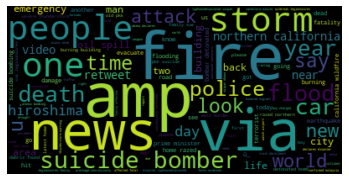

In [90]:
#WordCloud for disaster tweets in round 2 / nuvem de palavras para tweets sobre desastres do round 2
round2_disaster = createWordCloud(texts_df, 'round2', True)
round2_disaster

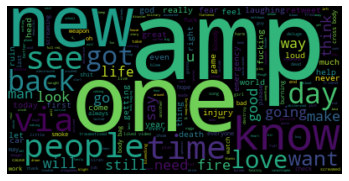

In [91]:
#WordCloud for disaster tweets in round 2 / nuvem de palavras para tweets normais do round 2
round2_not_disaster = createWordCloud(texts_df, 'round2', False)
round2_not_disaster

## Round 3: Data Cleaning and Twitter Words Removal

In [92]:
texts_df['round3'] = pre_process_text(texts_df, ABBREVIATIONS=False, LEMMATIZATION=False, STOPWORDS=False, WORD_REPLACE=False, WORD_REMOVE=True) #pre-processing text
#writing txt with texts
round3 = list(texts_df.round3) 
with open('round3.txt', 'w') as f:
    for text in round3:
        f.write(str(repr(text))+'\n')

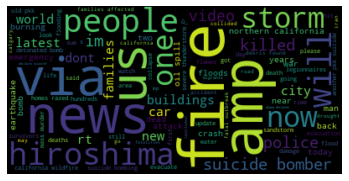

In [93]:
round3_disaster = createWordCloud(texts_df, 'round3', True)
round3_disaster

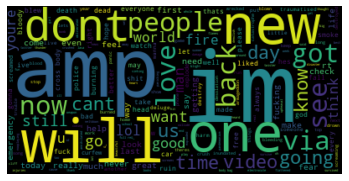

In [94]:
round3_not_disaster = createWordCloud(texts_df, 'round3', False)
round3_not_disaster

## Round 4: Data Cleaning Only

In [95]:
texts_df['round4'] = pre_process_text(texts_df, ABBREVIATIONS=False, LEMMATIZATION=False, STOPWORDS=False, WORD_REPLACE=False) 
#writing txt with texts
round4 = list(texts_df.round4) 
with open('round4.txt', 'w') as f:
    for text in round4:
        f.write(str(repr(text))+'\n')

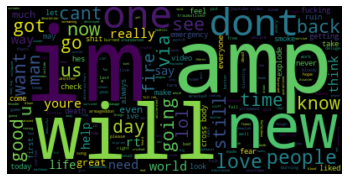

In [96]:
round4_disaster = createWordCloud(texts_df, 'round4', False)
round4_disaster

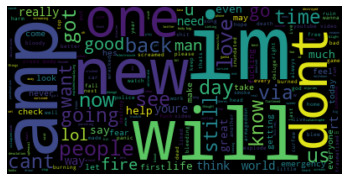

In [97]:
round4_not_disaster = createWordCloud(texts_df, 'round4', False)
round4_not_disaster

In [98]:
texts_df['round4'] = pre_process_text(texts_df, ABBREVIATIONS=False, LEMMATIZATION=False, STOPWORDS=False, WORD_REPLACE=False) 
#writing txt with texts
round4 = list(texts_df.round4) 
with open('round4.txt', 'w') as f:
    for text in round4:
        f.write(str(repr(text))+'\n')

# Neural Networks

## Neural Networs with Data from Round 1

In [99]:
from sklearn.model_selection import train_test_split

X_round1 = list(texts_df.round1)
target = list(texts_df.target)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_round1, target, test_size=0.3)
X_train1, X_val1, y_train1, y_val1 = np.array(X_train1), np.array(X_val1), np.array(y_train1), np.array(y_val1)  
X_train1.shape, X_val1.shape, y_train1.shape, y_val1.shape

((5329,), (2284,), (5329,), (2284,))

In [100]:
import tensorflow.keras as keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(X_train1)

X_train1 = tokenizer1.texts_to_sequences(X_train1)
X_train1 = pad_sequences(X_train1)

X_val1 = tokenizer1.texts_to_sequences(X_val1)
X_val1 = pad_sequences(X_val1, maxlen=X_train1.shape[1])

X_train1.shape, X_val1.shape, y_train1.shape, y_val1.shape

((5329, 30), (2284, 30), (5329,), (2284,))

### CNN

In [101]:
import tensorflow.keras as keras

model1_cnn = keras.models.Sequential([
    keras.layers.Embedding(len(tokenizer1.word_index)+1, 2, input_length=X_train1.shape[1]),
    keras.layers.Conv1D(2, (2), activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [102]:
model1_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
checkpoint1_cnn_cb = keras.callbacks.ModelCheckpoint('my_cnn_model1.h5', save_best_only=True)
early_stopping1_cnn_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [104]:
model1_cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 30, 2)             22602     
                                                                 
 conv1d_4 (Conv1D)           (None, 29, 2)             10        
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 14, 2)            0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 28)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 29        
                                                                 
Total params: 22,641
Trainable params: 22,641
Non-trainable params: 0
__________________________________________________

In [105]:
history1_cnn = model1_cnn.fit(X_train1, y_train1, epochs=20, validation_data=(X_val1, y_val1), 
                    callbacks=[checkpoint1_cnn_cb, early_stopping1_cnn_cb])

Epoch 1/20
167/167 [==============================] - 1s 3ms/step - loss: 0.6838 - accuracy: 0.5624 - val_loss: 0.6732 - val_accuracy: 0.5801
Epoch 2/20
167/167 [==============================] - 0s 3ms/step - loss: 0.6663 - accuracy: 0.5688 - val_loss: 0.6540 - val_accuracy: 0.5946
Epoch 3/20
167/167 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.6945 - val_loss: 0.6060 - val_accuracy: 0.7123
Epoch 4/20
167/167 [==============================] - 0s 3ms/step - loss: 0.5282 - accuracy: 0.8163 - val_loss: 0.5500 - val_accuracy: 0.7417
Epoch 5/20
167/167 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.8527 - val_loss: 0.5057 - val_accuracy: 0.7588
Epoch 6/20
167/167 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8818 - val_loss: 0.4867 - val_accuracy: 0.7745
Epoch 7/20
167/167 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.9054 - val_loss: 0.4767 - val_accuracy: 0.7842
Epoch 

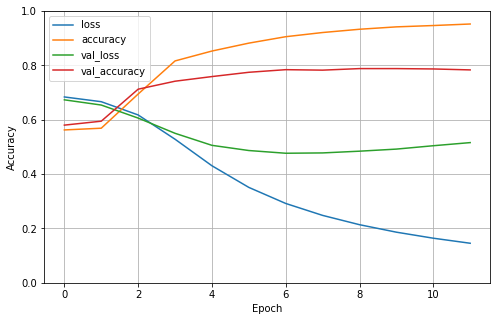

In [106]:
import pandas as pd 
import matplotlib.pyplot as plt

pd.DataFrame(history1_cnn.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.show()

### LSTM

In [107]:
model1_lstm = keras.models.Sequential([
    keras.layers.Embedding(len(tokenizer1.word_index)+1, 2, input_length=X_train1.shape[1]),
    keras.layers.LSTM(2, activation='relu'), 
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(1, activation='sigmoid')
])

In [108]:
model1_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
checkpoint1_lstm_cb = keras.callbacks.ModelCheckpoint('my_lstm_model1.h5', save_best_only=True)
early_stopping1_lstm_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [110]:
model1_lstm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 30, 2)             22602     
                                                                 
 lstm_4 (LSTM)               (None, 2)                 40        
                                                                 
 dropout_4 (Dropout)         (None, 2)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 22,645
Trainable params: 22,645
Non-trainable params: 0
_________________________________________________________________


In [111]:
history1_lstm = model1_lstm.fit(X_train1, y_train1, epochs=20, validation_data=(X_val1, y_val1), 
                    callbacks=[checkpoint1_lstm_cb, early_stopping1_lstm_cb])

Epoch 1/20
167/167 [==============================] - 2s 9ms/step - loss: 0.6896 - accuracy: 0.5691 - val_loss: 0.6843 - val_accuracy: 0.5836
Epoch 2/20
167/167 [==============================] - 1s 8ms/step - loss: 0.6520 - accuracy: 0.6892 - val_loss: 0.6499 - val_accuracy: 0.7785
Epoch 3/20
167/167 [==============================] - 1s 8ms/step - loss: 0.6307 - accuracy: 0.8123 - val_loss: 0.5693 - val_accuracy: 0.7929
Epoch 4/20
167/167 [==============================] - 1s 8ms/step - loss: 0.5067 - accuracy: 0.8405 - val_loss: 0.5493 - val_accuracy: 0.7947
Epoch 5/20
167/167 [==============================] - 1s 7ms/step - loss: 0.4676 - accuracy: 0.8497 - val_loss: 0.5421 - val_accuracy: 0.7933
Epoch 6/20
167/167 [==============================] - 1s 6ms/step - loss: 0.4315 - accuracy: 0.8632 - val_loss: 0.5445 - val_accuracy: 0.7872
Epoch 7/20
167/167 [==============================] - 1s 7ms/step - loss: 0.4032 - accuracy: 0.8724 - val_loss: 0.5625 - val_accuracy: 0.7881
Epoch 

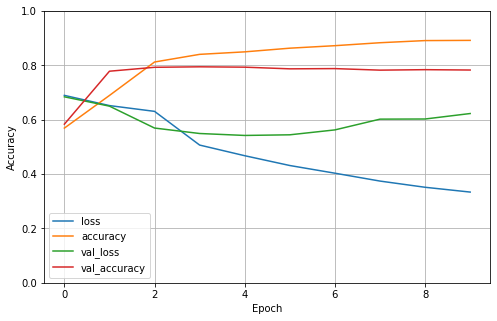

In [112]:
import pandas as pd 
import matplotlib.pyplot as plt

pd.DataFrame(history1_lstm.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.show() 

## Modeling with Data from Round 2

In [113]:
from sklearn.model_selection import train_test_split

X_round2 = list(texts_df.round2)
target = list(texts_df.target)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_round2, target, test_size=0.3)
# y_train2, y_val2 = np.array(y_train2), np.array(y_val2) 
X_train2, X_val2, y_train2, y_val2 = np.array(X_train2), np.array(X_val2), np.array(y_train2), np.array(y_val2)
X_train2.shape, X_val2.shape, y_train2.shape, y_val2.shape


((5329,), (2284,), (5329,), (2284,))

In [114]:
import tensorflow.keras as keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(X_train2)

X_train2 = tokenizer2.texts_to_sequences(X_train2)
X_train2 = pad_sequences(X_train2)

X_val2 = tokenizer2.texts_to_sequences(X_val2)
X_val2 = pad_sequences(X_val2, maxlen=X_train2.shape[1])

X_train2.shape, X_val2.shape, y_train2.shape, y_val2.shape

((5329, 23), (2284, 23), (5329,), (2284,))

### CNN

In [115]:
import tensorflow.keras as keras

model2_cnn = keras.models.Sequential([
    keras.layers.Embedding(len(tokenizer2.word_index)+1, 2, input_length=X_train2.shape[1]),
    keras.layers.Conv1D(2, (2), activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [116]:
model2_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [117]:
checkpoint2_cnn_cb = keras.callbacks.ModelCheckpoint('my_cnn_model2.h5', save_best_only=True)
early_stopping2_cnn_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [118]:
model2_cnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 23, 2)             22802     
                                                                 
 conv1d_5 (Conv1D)           (None, 22, 2)             10        
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 11, 2)            0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 22)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 23        
                                                                 
Total params: 22,835
Trainable params: 22,835
Non-trainable params: 0
_________________________________________________

In [119]:
history2_cnn = model2_cnn.fit(X_train2, y_train2, epochs=20, validation_data=(X_val2, y_val2), 
                    callbacks=[checkpoint2_cnn_cb, early_stopping2_cnn_cb])

Epoch 1/20
167/167 [==============================] - 1s 2ms/step - loss: 0.6859 - accuracy: 0.5676 - val_loss: 0.6800 - val_accuracy: 0.5683
Epoch 2/20
167/167 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.5757 - val_loss: 0.6701 - val_accuracy: 0.5823
Epoch 3/20
167/167 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.6253 - val_loss: 0.6491 - val_accuracy: 0.6344
Epoch 4/20
167/167 [==============================] - 0s 2ms/step - loss: 0.5735 - accuracy: 0.7758 - val_loss: 0.6174 - val_accuracy: 0.6729
Epoch 5/20
167/167 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.8448 - val_loss: 0.5852 - val_accuracy: 0.6975
Epoch 6/20
167/167 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8822 - val_loss: 0.5657 - val_accuracy: 0.7163
Epoch 7/20
167/167 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.9041 - val_loss: 0.5581 - val_accuracy: 0.7123
Epoch 

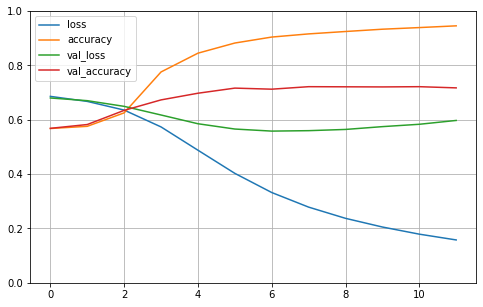

In [120]:
import pandas as pd 
import matplotlib.pyplot as plt

pd.DataFrame(history2_cnn.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### LSTM

In [121]:
model2_lstm = keras.models.Sequential([
    keras.layers.Embedding(len(tokenizer2.word_index)+1, 2, input_length=X_train2.shape[1]),
    keras.layers.LSTM(2, activation='relu'), 
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(1, activation='sigmoid')
])

In [122]:
model2_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [123]:
checkpoint2_lstm_cb = keras.callbacks.ModelCheckpoint('my_lstm_model2.h5', save_best_only=True)
early_stopping2_lstm_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [124]:
model2_lstm.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 23, 2)             22802     
                                                                 
 lstm_5 (LSTM)               (None, 2)                 40        
                                                                 
 dropout_5 (Dropout)         (None, 2)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 22,845
Trainable params: 22,845
Non-trainable params: 0
_________________________________________________________________


In [125]:
history2_lstm = model2_lstm.fit(X_train2, y_train2, epochs=20, validation_data=(X_val2, y_val2), 
                    callbacks=[checkpoint2_lstm_cb, early_stopping2_lstm_cb])

Epoch 1/20
167/167 [==============================] - 2s 8ms/step - loss: 0.6809 - accuracy: 0.5691 - val_loss: 0.6548 - val_accuracy: 0.5683
Epoch 2/20
167/167 [==============================] - 1s 7ms/step - loss: 0.6252 - accuracy: 0.6147 - val_loss: 0.5823 - val_accuracy: 0.7237
Epoch 3/20
167/167 [==============================] - 1s 7ms/step - loss: 0.5093 - accuracy: 0.7228 - val_loss: 0.4886 - val_accuracy: 0.7758
Epoch 4/20
167/167 [==============================] - 1s 6ms/step - loss: 0.4137 - accuracy: 0.7557 - val_loss: 0.4730 - val_accuracy: 0.7828
Epoch 5/20
167/167 [==============================] - 1s 6ms/step - loss: 0.3526 - accuracy: 0.7889 - val_loss: 0.5006 - val_accuracy: 0.7828
Epoch 6/20
167/167 [==============================] - 1s 6ms/step - loss: 0.3236 - accuracy: 0.8032 - val_loss: 0.4839 - val_accuracy: 0.7898
Epoch 7/20
167/167 [==============================] - 1s 6ms/step - loss: 0.3028 - accuracy: 0.8146 - val_loss: 0.5276 - val_accuracy: 0.7859
Epoch 

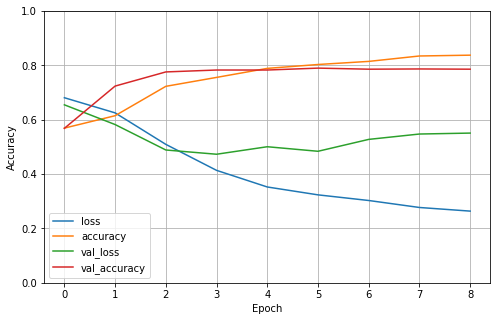

In [126]:
import pandas as pd 
import matplotlib.pyplot as plt

pd.DataFrame(history2_lstm.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.show()

## Modeling with data from round 3

In [127]:
from sklearn.model_selection import train_test_split

X_round3 = list(texts_df.round3)
target = list(texts_df.target)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_round3, target, test_size=0.3)
X_train3, X_val3, y_train3, y_val3 = np.array(X_train3), np.array(X_val3), np.array(y_train3), np.array(y_val3)  
X_train3.shape, X_val3.shape, y_train3.shape, y_val3.shape

((5329,), (2284,), (5329,), (2284,))

In [128]:
import tensorflow.keras as keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer3 = Tokenizer()
tokenizer3.fit_on_texts(X_train3)

X_train3 = tokenizer3.texts_to_sequences(X_train3)
X_train3 = pad_sequences(X_train3)

X_val3 = tokenizer3.texts_to_sequences(X_val3)
X_val3 = pad_sequences(X_val3, maxlen=X_train3.shape[1])

X_train3.shape, X_val3.shape, y_train3.shape, y_val3.shape

((5329, 31), (2284, 31), (5329,), (2284,))

### CNN

In [129]:
import tensorflow.keras as keras

model3_cnn = keras.models.Sequential([
    keras.layers.Embedding(len(tokenizer3.word_index)+1, 2, input_length=X_train3.shape[1]),
    keras.layers.Conv1D(2, (2), activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [130]:
model3_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [131]:
checkpoint3_cnn_cb = keras.callbacks.ModelCheckpoint('my_cnn_model3.h5', save_best_only=True)
early_stopping3_cnn_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [132]:
model3_cnn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 31, 2)             23982     
                                                                 
 conv1d_6 (Conv1D)           (None, 30, 2)             10        
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 15, 2)            0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 30)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 31        
                                                                 
Total params: 24,023
Trainable params: 24,023
Non-trainable params: 0
_________________________________________________

In [133]:
history3_cnn = model3_cnn.fit(X_train3, y_train3, epochs=20, validation_data=(X_val3, y_val3), 
                    callbacks=[checkpoint3_cnn_cb, early_stopping3_cnn_cb])

Epoch 1/20
167/167 [==============================] - 1s 3ms/step - loss: 0.6838 - accuracy: 0.5701 - val_loss: 0.6800 - val_accuracy: 0.5718
Epoch 2/20
167/167 [==============================] - 1s 3ms/step - loss: 0.6722 - accuracy: 0.5705 - val_loss: 0.6738 - val_accuracy: 0.5753
Epoch 3/20
167/167 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.6056 - val_loss: 0.6598 - val_accuracy: 0.6147
Epoch 4/20
167/167 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.7110 - val_loss: 0.6298 - val_accuracy: 0.6664
Epoch 5/20
167/167 [==============================] - 0s 2ms/step - loss: 0.5182 - accuracy: 0.8129 - val_loss: 0.5884 - val_accuracy: 0.7032
Epoch 6/20
167/167 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8583 - val_loss: 0.5543 - val_accuracy: 0.7202
Epoch 7/20
167/167 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.8902 - val_loss: 0.5377 - val_accuracy: 0.7360
Epoch 

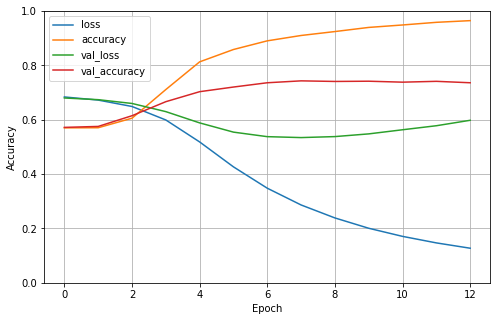

In [134]:
import pandas as pd 
import matplotlib.pyplot as plt

pd.DataFrame(history3_cnn.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.show()

### LSTM

In [135]:
model3_lstm = keras.models.Sequential([
    keras.layers.Embedding(len(tokenizer3.word_index)+1, 2, input_length=X_train3.shape[1]),
    keras.layers.LSTM(2, activation='relu'), 
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(1, activation='sigmoid')
])

In [136]:
model3_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [137]:
checkpoint3_lstm_cb = keras.callbacks.ModelCheckpoint('my_lstm_model3.h5', save_best_only=True)
early_stopping3_lstm_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [138]:
model3_lstm.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 31, 2)             23982     
                                                                 
 lstm_6 (LSTM)               (None, 2)                 40        
                                                                 
 dropout_6 (Dropout)         (None, 2)                 0         
                                                                 
 dense_13 (Dense)            (None, 1)                 3         
                                                                 
Total params: 24,025
Trainable params: 24,025
Non-trainable params: 0
_________________________________________________________________


In [139]:
history3_lstm = model3_lstm.fit(X_train3, y_train3, epochs=20, validation_data=(X_val3, y_val3), 
                    callbacks=[checkpoint3_lstm_cb, early_stopping3_lstm_cb])

Epoch 1/20
167/167 [==============================] - 3s 10ms/step - loss: 0.6902 - accuracy: 0.5622 - val_loss: 0.6870 - val_accuracy: 0.5718
Epoch 2/20
167/167 [==============================] - 1s 9ms/step - loss: 0.6799 - accuracy: 0.5990 - val_loss: 0.6466 - val_accuracy: 0.6948
Epoch 3/20
167/167 [==============================] - 1s 8ms/step - loss: 0.5981 - accuracy: 0.7699 - val_loss: 0.5720 - val_accuracy: 0.7671
Epoch 4/20
167/167 [==============================] - 1s 7ms/step - loss: 0.5197 - accuracy: 0.8202 - val_loss: 0.5416 - val_accuracy: 0.7802
Epoch 5/20
167/167 [==============================] - 1s 7ms/step - loss: 0.4658 - accuracy: 0.8489 - val_loss: 0.5506 - val_accuracy: 0.7811
Epoch 6/20
167/167 [==============================] - 1s 7ms/step - loss: 0.4203 - accuracy: 0.8664 - val_loss: 0.6240 - val_accuracy: 0.7815
Epoch 7/20
167/167 [==============================] - 1s 7ms/step - loss: 0.3829 - accuracy: 0.8748 - val_loss: 0.7582 - val_accuracy: 0.7850
Epoch

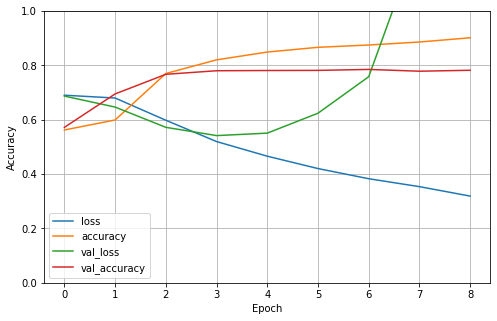

In [140]:
import pandas as pd 
import matplotlib.pyplot as plt

pd.DataFrame(history3_lstm.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.show()

## Modeling with data from round 4

In [141]:
from sklearn.model_selection import train_test_split

X_round4 = list(texts_df.round4)
target = list(texts_df.target)
X_train4, X_val4, y_train4, y_val4 = train_test_split(X_round4, target, test_size=0.3)
X_train4, X_val4, y_train4, y_val4 = np.array(X_train4), np.array(X_val4), np.array(y_train4), np.array(y_val4)  
X_train4.shape, X_val4.shape, y_train4.shape, y_val4.shape

((5329,), (2284,), (5329,), (2284,))

In [142]:
import tensorflow.keras as keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer4 = Tokenizer()
tokenizer4.fit_on_texts(X_train4)

X_train4 = tokenizer4.texts_to_sequences(X_train4)
X_train4 = pad_sequences(X_train4)

X_val4 = tokenizer4.texts_to_sequences(X_val4)
X_val4 = pad_sequences(X_val4, maxlen=X_train4.shape[1])

X_train4.shape, X_val4.shape, y_train4.shape, y_val4.shape

((5329, 31), (2284, 31), (5329,), (2284,))

### CNN

In [143]:
import tensorflow.keras as keras

model4_cnn = keras.models.Sequential([
    keras.layers.Embedding(len(tokenizer4.word_index)+1, 2, input_length=X_train4.shape[1]),
    keras.layers.Conv1D(2, (2), activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [144]:
model4_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [145]:
checkpoint4_cnn_cb = keras.callbacks.ModelCheckpoint('my_cnn_model4.h5', save_best_only=True)
early_stopping4_cnn_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [146]:
model4_cnn.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 31, 2)             35468     
                                                                 
 conv1d_7 (Conv1D)           (None, 30, 2)             10        
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 15, 2)            0         
 1D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 30)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 31        
                                                                 
Total params: 35,509
Trainable params: 35,509
Non-trainable params: 0
_________________________________________________

In [147]:
history4_cnn = model4_cnn.fit(X_train4, y_train4, epochs=20, validation_data=(X_val4, y_val4), 
                    callbacks=[checkpoint4_cnn_cb, early_stopping4_cnn_cb])

Epoch 1/20
167/167 [==============================] - 1s 3ms/step - loss: 0.6898 - accuracy: 0.5658 - val_loss: 0.6886 - val_accuracy: 0.5560
Epoch 2/20
167/167 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6082 - val_loss: 0.6836 - val_accuracy: 0.5893
Epoch 3/20
167/167 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.7611 - val_loss: 0.6750 - val_accuracy: 0.6068
Epoch 4/20
167/167 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.8542 - val_loss: 0.6790 - val_accuracy: 0.5919
Epoch 5/20
167/167 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8992 - val_loss: 0.7085 - val_accuracy: 0.5753
Epoch 6/20
167/167 [==============================] - 0s 1ms/step - loss: 0.2892 - accuracy: 0.9285 - val_loss: 0.7484 - val_accuracy: 0.5722
Epoch 7/20
167/167 [==============================] - 0s 1ms/step - loss: 0.2157 - accuracy: 0.9535 - val_loss: 0.7951 - val_accuracy: 0.5753
Epoch 

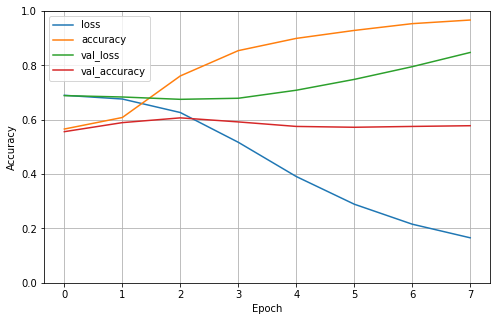

In [148]:
import pandas as pd 
import matplotlib.pyplot as plt

pd.DataFrame(history4_cnn.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.show() 

### LSTM

In [149]:
model4_lstm = keras.models.Sequential([
    keras.layers.Embedding(len(tokenizer4.word_index)+1, 2, input_length=X_train4.shape[1]),
    keras.layers.LSTM(2, activation='relu'), 
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(1, activation='sigmoid')
])

In [150]:
model4_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [151]:
checkpoint4_lstm_cb = keras.callbacks.ModelCheckpoint('my_lstm_model4.h5', save_best_only=True)
early_stopping4_lstm_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [152]:
model4_lstm.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 31, 2)             35468     
                                                                 
 lstm_7 (LSTM)               (None, 2)                 40        
                                                                 
 dropout_7 (Dropout)         (None, 2)                 0         
                                                                 
 dense_15 (Dense)            (None, 1)                 3         
                                                                 
Total params: 35,511
Trainable params: 35,511
Non-trainable params: 0
_________________________________________________________________


In [153]:
history4_lstm = model4_lstm.fit(X_train4, y_train4, epochs=20, validation_data=(X_val4, y_val4), 
                    callbacks=[checkpoint4_lstm_cb, early_stopping4_lstm_cb])

Epoch 1/20
167/167 [==============================] - 2s 9ms/step - loss: 0.6901 - accuracy: 0.5727 - val_loss: 0.6889 - val_accuracy: 0.5560
Epoch 2/20
167/167 [==============================] - 1s 7ms/step - loss: 0.6788 - accuracy: 0.6012 - val_loss: 0.6236 - val_accuracy: 0.7364
Epoch 3/20
167/167 [==============================] - 1s 7ms/step - loss: 0.5687 - accuracy: 0.7928 - val_loss: 0.5643 - val_accuracy: 0.7710
Epoch 4/20
167/167 [==============================] - 1s 7ms/step - loss: 0.4839 - accuracy: 0.8422 - val_loss: 0.5445 - val_accuracy: 0.7723
Epoch 5/20
167/167 [==============================] - 1s 7ms/step - loss: 0.4388 - accuracy: 0.8636 - val_loss: 0.5407 - val_accuracy: 0.7758
Epoch 6/20
167/167 [==============================] - 1s 7ms/step - loss: 0.3854 - accuracy: 0.8838 - val_loss: 0.5901 - val_accuracy: 0.7758
Epoch 7/20
167/167 [==============================] - 1s 7ms/step - loss: 0.3482 - accuracy: 0.9020 - val_loss: 0.6087 - val_accuracy: 0.7745
Epoch 

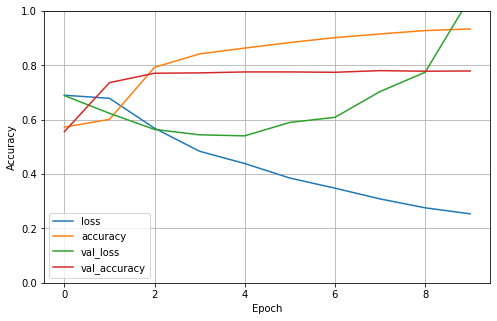

In [154]:
import pandas as pd 
import matplotlib.pyplot as plt

pd.DataFrame(history4_lstm.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.show()